 The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
df= pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv", sep= ',')

In [4]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


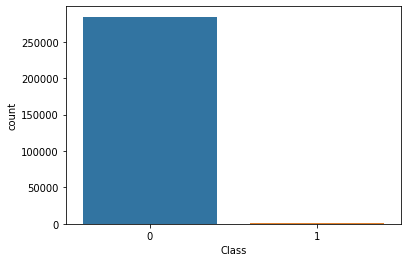

In [5]:
sns.countplot(df['Class'])
plt.show()

seeems like the data is imbalanced so we need imbalanced learn package

In [6]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.metrics import classification_report_imbalanced

In [7]:
#let's do some EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


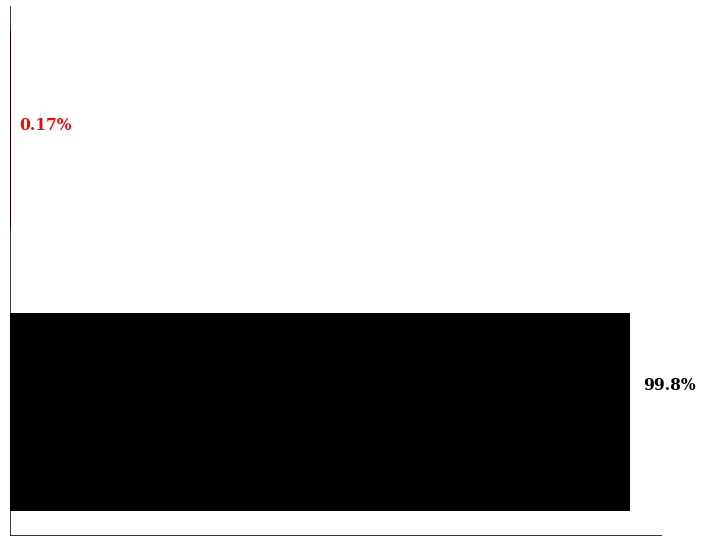

In [10]:
#let's visualize classes
d1= pd.DataFrame(df.groupby(['Class'])['Class'].count())
fig,axes=plt.subplots(figsize= (12,10), dpi= 70)
axes.barh([0],d1.Class[0], height= 0.7, color= 'black')
plt.text(290000,0.08, '99.8%',{'fontname':'Serif','weight':'bold' ,'size':'16','color':'black'})
axes.barh([1], d1.Class[1] ,height= 0.7, color= 'red')
plt.text(3900,1, '0.17%',{'fontname':'Serif', 'weight':'bold','size':'16','color':'red'})

axes.axes.get_xaxis().set_visible(False)
axes.axes.get_yaxis().set_visible(False)
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
plt.show()


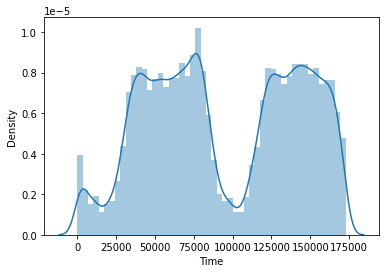

In [11]:
#let's do it without sampling and with oversampling
sns.distplot(df['Time'])
plt.show()

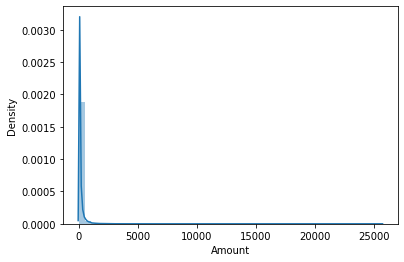

In [12]:
sns.distplot(df['Amount'])
plt.show()

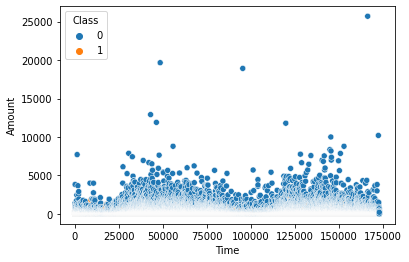

In [13]:
sns.scatterplot(x= 'Time', y='Amount', hue= 'Class', data = df)

plt.show()

<AxesSubplot:xlabel='Class', ylabel='Amount'>

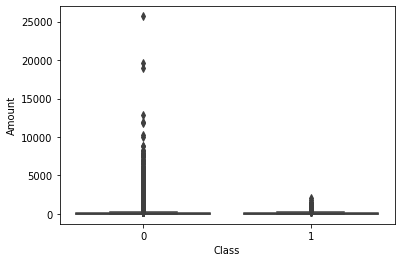

In [14]:
sns.boxplot(x=df['Class'], y=df['Amount'])

looks like there are outliers

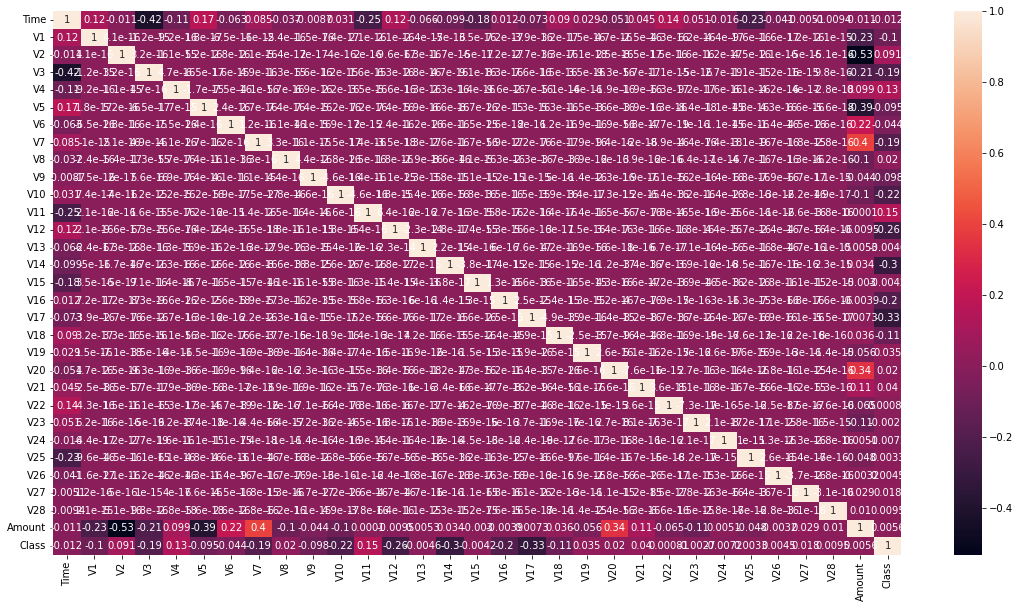

In [15]:
#let's checl correrlation now
plt.figure(figsize= (19,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [16]:
#becuasue of outliers let;s scale it
from sklearn.preprocessing import RobustScaler

rbst= RobustScaler()



In [17]:
df['Amount']= rbst.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time']= rbst.fit_transform(df['Time'].values.reshape(-1,1))

In [18]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

### splitting training and testing set

In [19]:
X= df.drop('Class', axis =1)
Y= df.Class.values

In [20]:
Y

array([0, 0, 0, ..., 0, 0, 0])

In [21]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.034951,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653
284803,1.034963,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986
284804,1.034975,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096
284805,1.034975,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680


##### importing relevant libraries


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier as Knn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor


from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report , confusion_matrix
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

In [23]:
X_train,X_test,y_train,y_test= train_test_split(X,Y,test_size= 0.2, random_state= 10)

In [24]:
# a fucntion to see things easi;ly
def predict(model,X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    print(confusion_matrix(y_test,preds))
    print(classification_report(y_test,preds))
    print("roc_score",roc_auc_score(y_test, preds))
    print("Precision :",metrics.precision_score(y_test, preds))
    print("Recall :",metrics.recall_score(y_test, preds))
    fig, axes = plt.subplots(1,2,figsize=(27,12))
    
    axes[0].set_title("Confusion Matrix")
    sns.heatmap(confusion_matrix(y_test,preds),annot=True,fmt='0.0f',ax=axes[0],cmap="YlGnBu")

   
    plt.show()
   
    
    return accuracy_score(y_test,preds)


In [25]:
# a fucntion to see things easi;ly
def predict2(model,X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    print(confusion_matrix(y_test,preds))
    print(classification_report(y_test,preds))
    print("Precision Neural Net:",metrics.precision_score(y_test, preds))
    print("Recall Neural Net:",metrics.recall_score(y_test, preds))
    print("roc_score",roc_auc_score(y_test, preds))
    fig, axes = plt.subplots(1,2,figsize=(27,12))
    
    axes[0].set_title("Confusion Matrix")
    sns.heatmap(confusion_matrix(y_test,preds),annot=True,fmt='0.0f',ax=axes[0],cmap="YlGnBu")

    tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': model.feature_importances_})
    tmp = tmp.sort_values(by='Feature importance',ascending=False)
    s = sns.barplot(x='Feature',y='Feature importance',data=tmp,color='red',ax=axes[1])
    axes[1].set_title("Feature Importance")
    plt.show()
    return accuracy_score(y_test,preds)


[[56859     9]
 [   31    63]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.88      0.67      0.76        94

    accuracy                           1.00     56962
   macro avg       0.94      0.84      0.88     56962
weighted avg       1.00      1.00      1.00     56962

roc_score 0.8350272523604495
Precision : 0.875
Recall : 0.6702127659574468


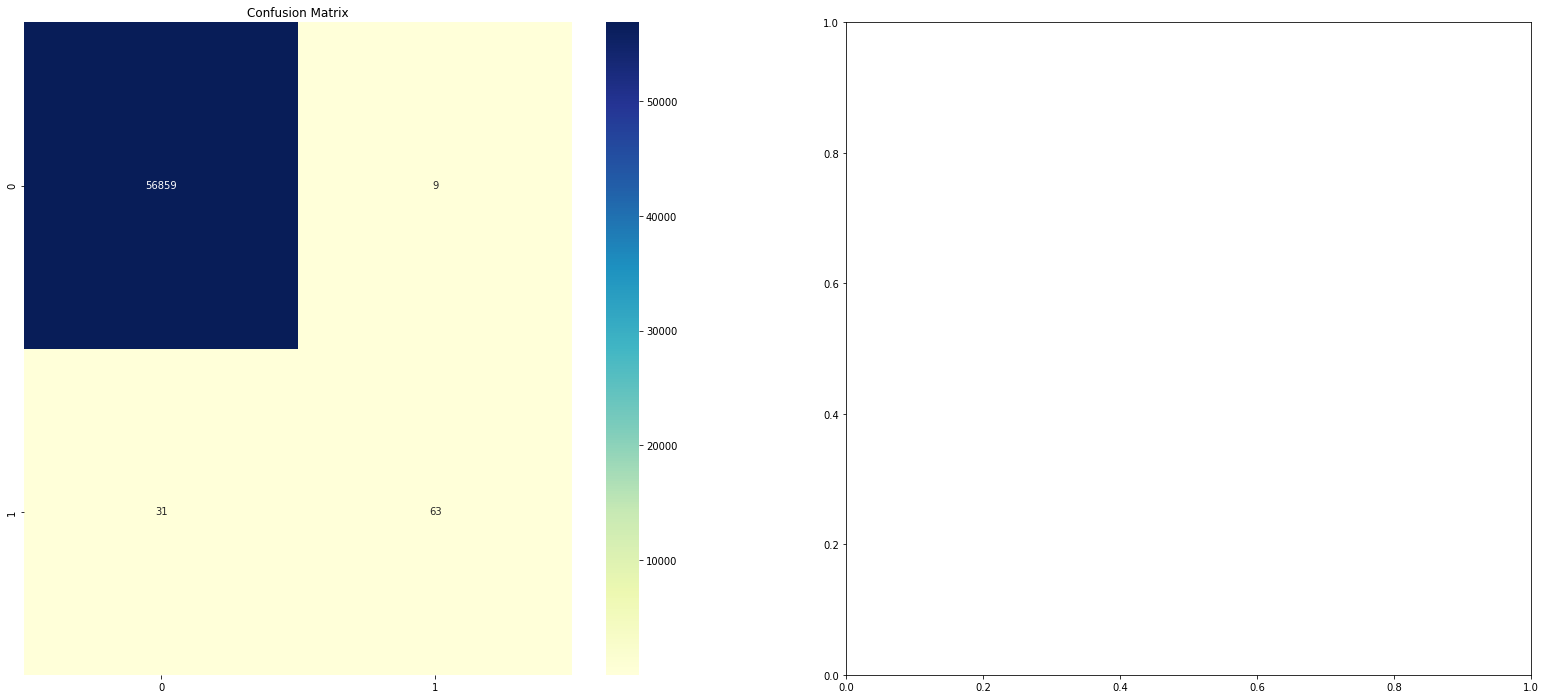

0.9992977774656788

In [26]:
predict(LogisticRegression(max_iter=50000), X_train, X_test, y_train, y_test)

[17:08:59] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[[56866     2]
 [   17    77]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.97      0.82      0.89        94

    accuracy                           1.00     56962
   macro avg       0.99      0.91      0.95     56962
weighted avg       1.00      1.00      1.00     56962

Precision Neural Net: 0.9746835443037974
Recall Neural Net: 0.8191489361702128
roc_score 0.9095568835032677


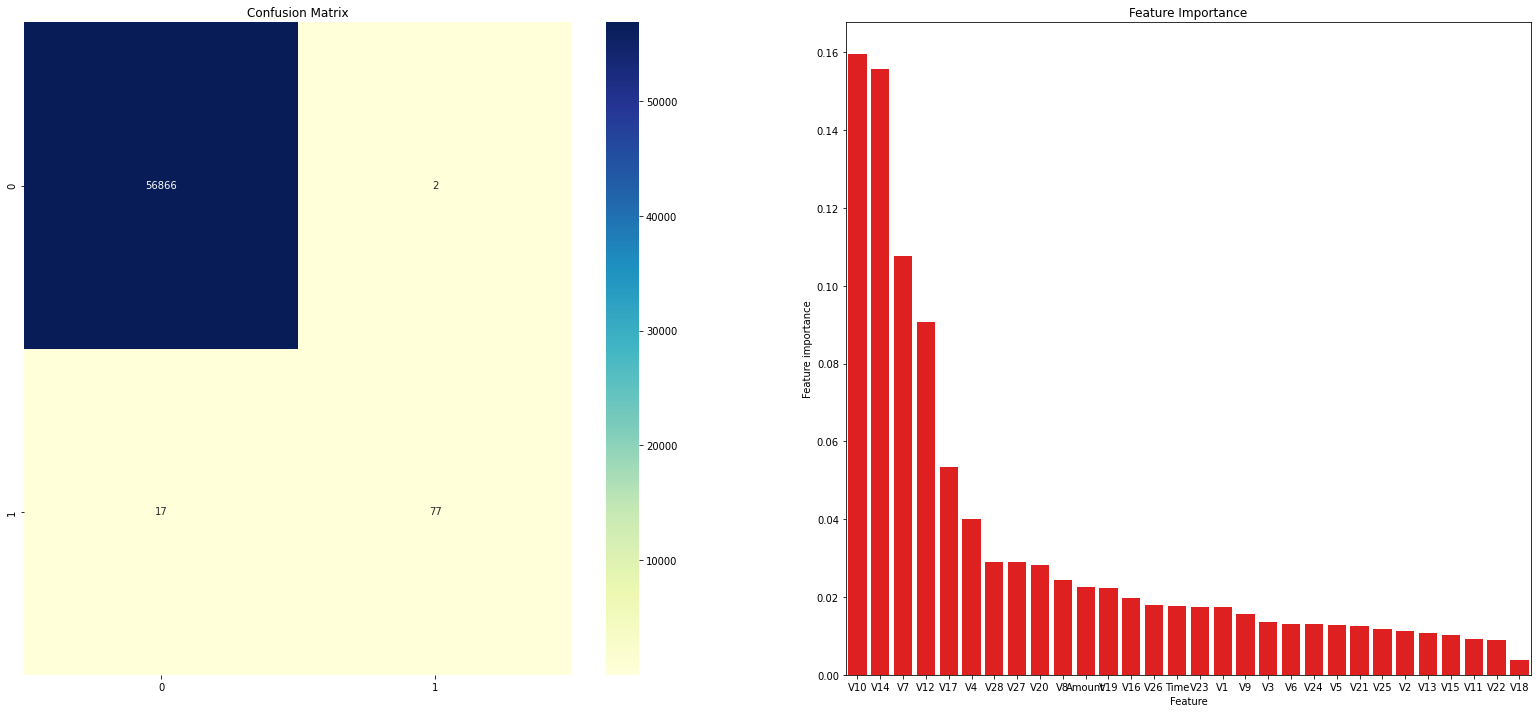

0.9996664442961974

In [27]:
predict2(xgb.XGBClassifier(silent=True,max_depth=2,tree_method = 'gpu_hist',predictor='gpu_predictor',eval_metric='auc'),X_train,X_test, y_train, y_test)

[[56866     2]
 [   16    78]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.97      0.83      0.90        94

    accuracy                           1.00     56962
   macro avg       0.99      0.91      0.95     56962
weighted avg       1.00      1.00      1.00     56962

Precision Neural Net: 0.975
Recall Neural Net: 0.8297872340425532
roc_score 0.9148760324394379


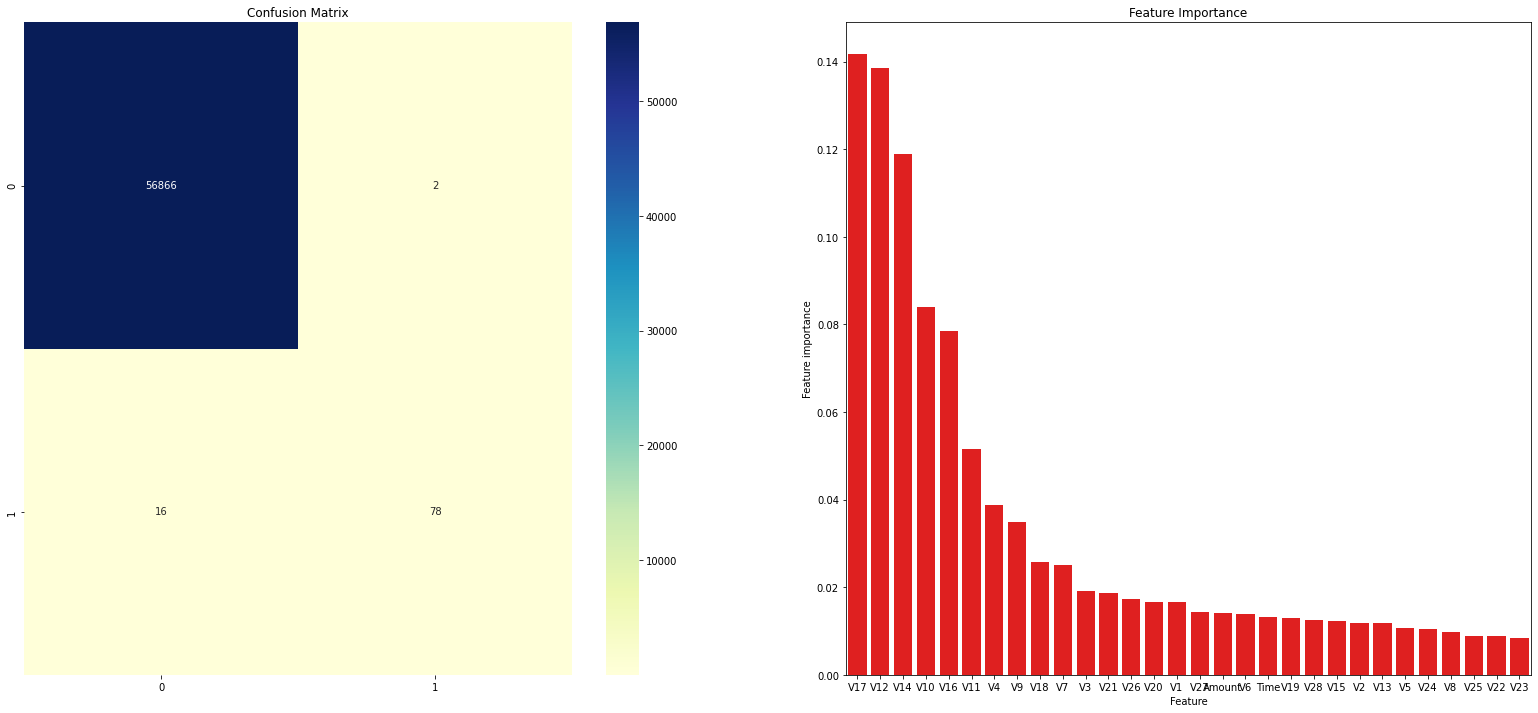

0.9996839998595555

In [28]:
predict2(RandomForestClassifier(n_estimators=100,n_jobs=4,verbose=False),X_train,X_test, y_train, y_test)

[[56857    11]
 [   19    75]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.87      0.80      0.83        94

    accuracy                           1.00     56962
   macro avg       0.94      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Precision Neural Net: 0.872093023255814
Recall Neural Net: 0.7978723404255319
roc_score 0.8988394550126534


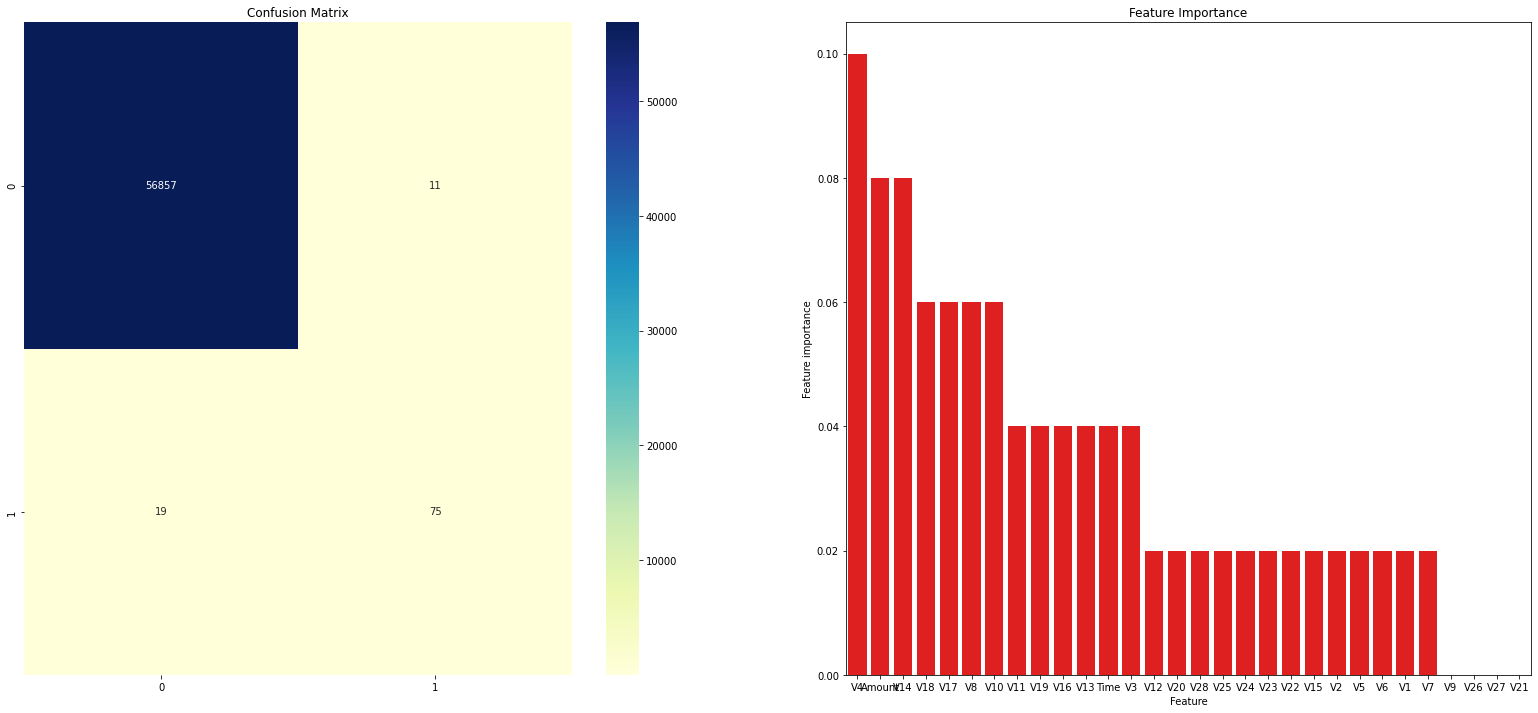

0.9994733330992591

In [29]:
predict2(AdaBoostClassifier(random_state=42,
                        algorithm='SAMME.R',
                         learning_rate=0.8,),X_train,X_test, y_train, y_test)

[[56853    15]
 [   30    64]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.81      0.68      0.74        94

    accuracy                           1.00     56962
   macro avg       0.90      0.84      0.87     56962
weighted avg       1.00      1.00      1.00     56962

Precision Neural Net: 0.810126582278481
Recall Neural Net: 0.6808510638297872
roc_score 0.8402936475511038


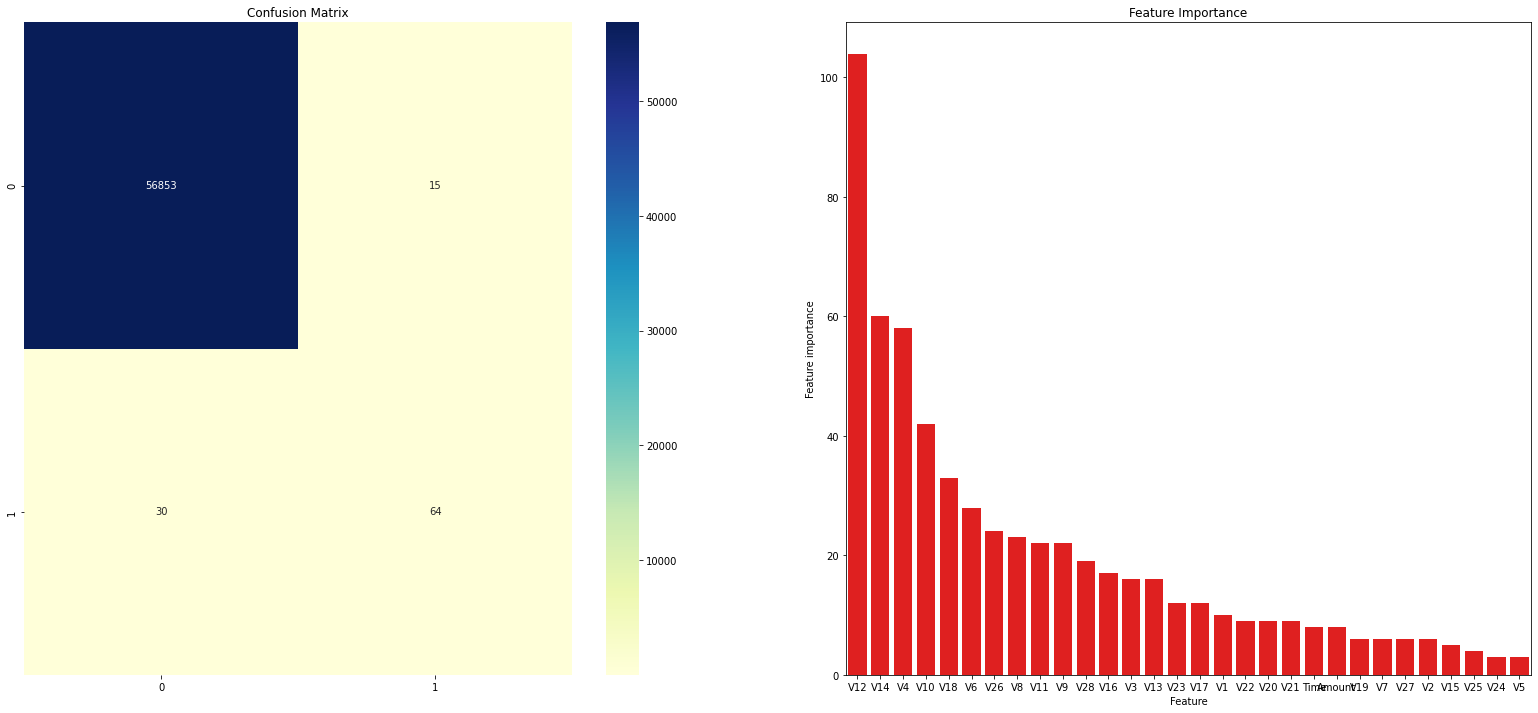

0.9992099996488887

In [30]:
predict2(lgb.LGBMClassifier(
    objective='binary',
        metric = 'auc',
          learning_rate= 0.05,
          num_leaves =  7,max_depth=4,min_child_samples= 100,  
          max_bin=100,device= 'gpu'),X_train,X_test, y_train, y_test)

[[56867     1]
 [   22    72]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.99      0.77      0.86        94

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962

roc_score 0.882969931113336
Precision : 0.9863013698630136
Recall : 0.7659574468085106


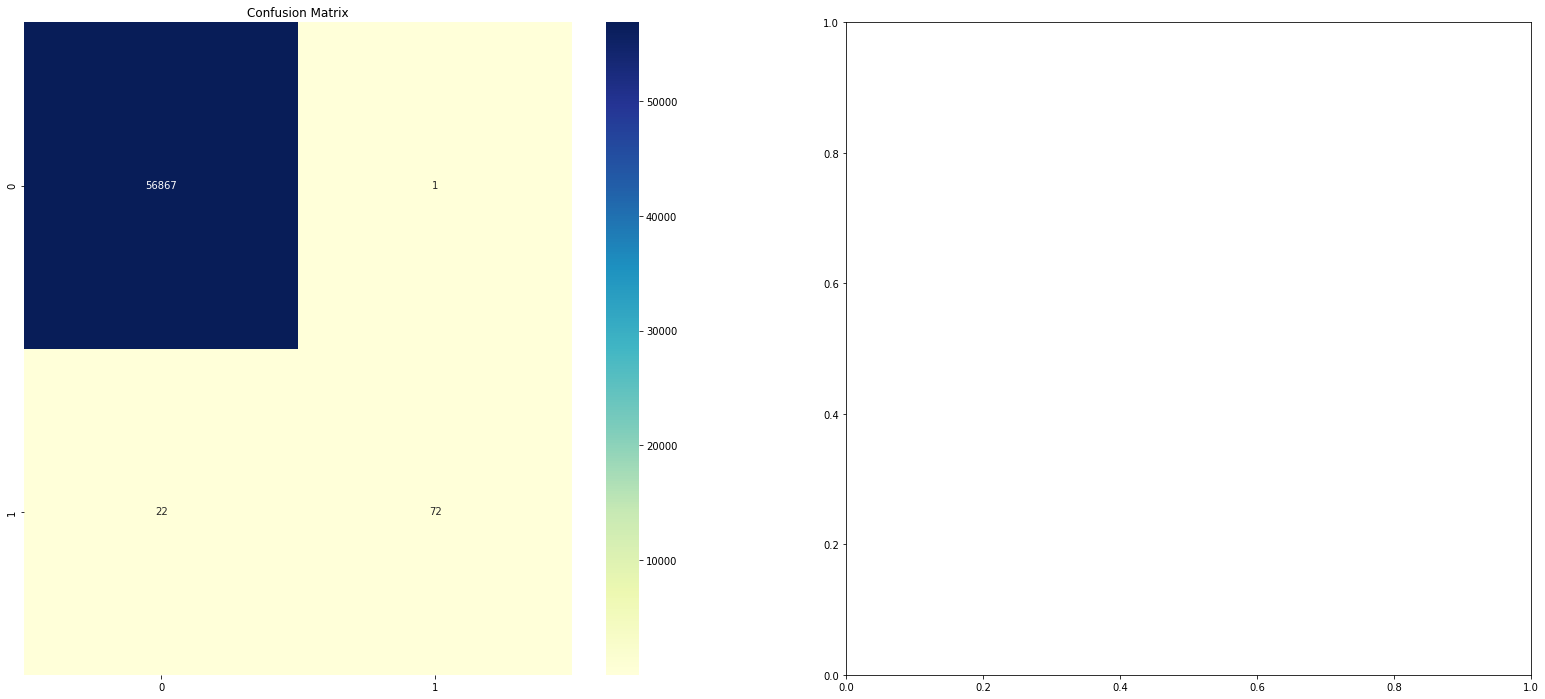

0.9995962220427653

In [31]:
predict(Knn(n_neighbors=5),X_train,X_test,y_train,y_test)

[[55575  1293]
 [   16    78]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56868
           1       0.06      0.83      0.11        94

    accuracy                           0.98     56962
   macro avg       0.53      0.90      0.55     56962
weighted avg       1.00      0.98      0.99     56962

roc_score 0.9035251848625933
Precision : 0.05689277899343545
Recall : 0.8297872340425532


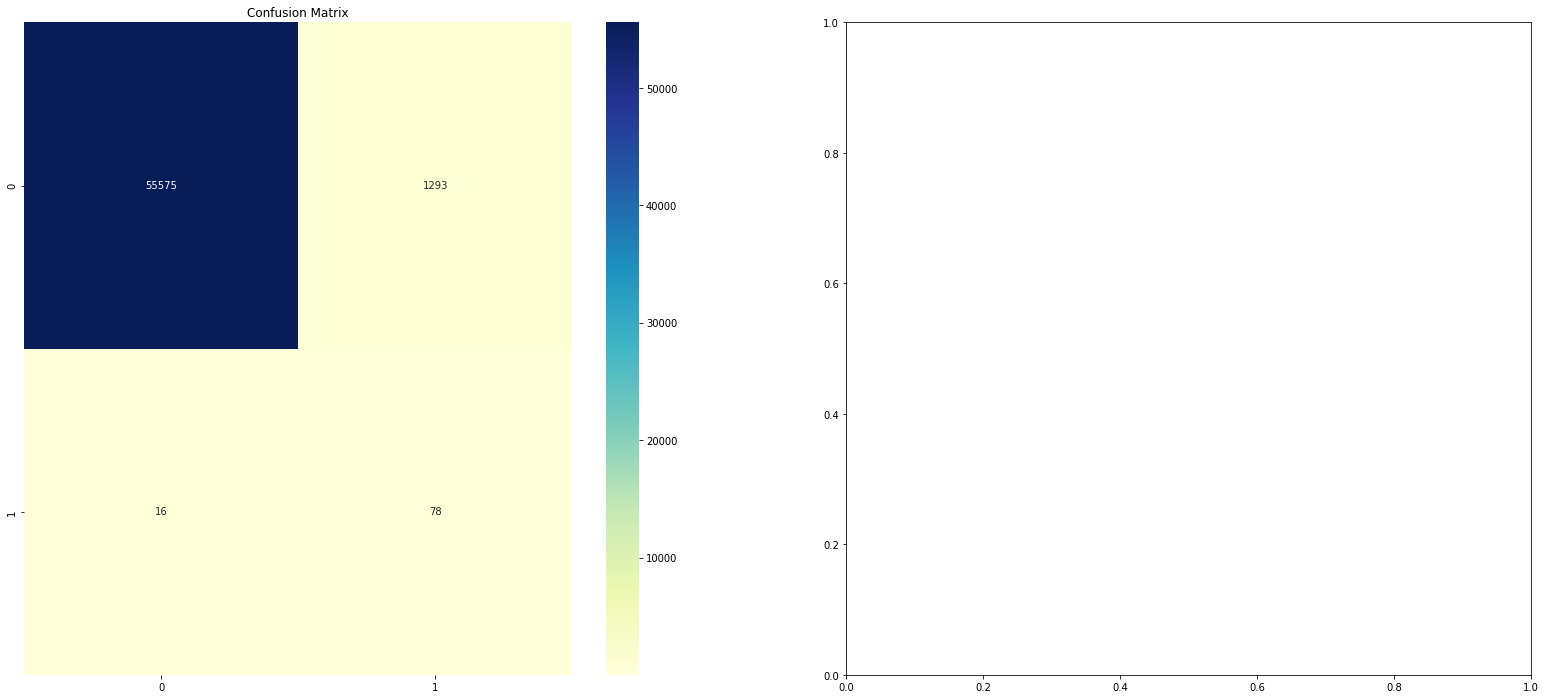

0.9770197675643412

In [32]:
predict(GaussianNB(),X_train,X_test,y_train,y_test )

now le'ts try same after sampling


In [33]:
smt = SMOTE(random_state=42)
# adasyn = ADASYN(random_state=42)
X_smote,Y_smote = smt.fit_resample(X_train,y_train)

[[55409  1459]
 [    8    86]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56868
           1       0.06      0.91      0.10        94

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.97      0.99     56962

roc_score 0.9446188560593476
Precision : 0.05566343042071197
Recall : 0.9148936170212766


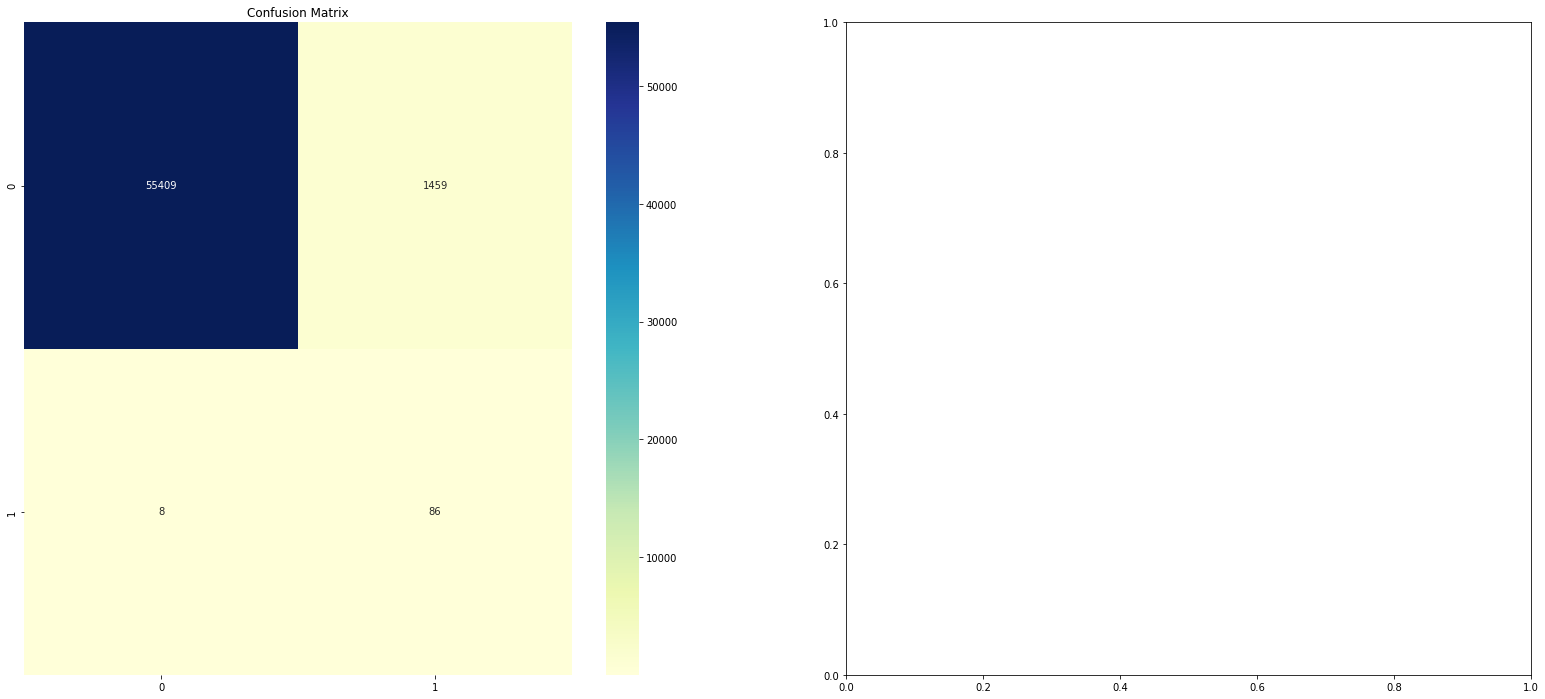

0.9742459885537726

In [34]:
predict(LogisticRegression(max_iter=50000), X_smote, X_test, Y_smote, y_test)

[17:15:07] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[[56354   514]
 [   12    82]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56868
           1       0.14      0.87      0.24        94

    accuracy                           0.99     56962
   macro avg       0.57      0.93      0.62     56962
weighted avg       1.00      0.99      0.99     56962

Precision Neural Net: 0.13758389261744966
Recall Neural Net: 0.8723404255319149
roc_score 0.931650975233426


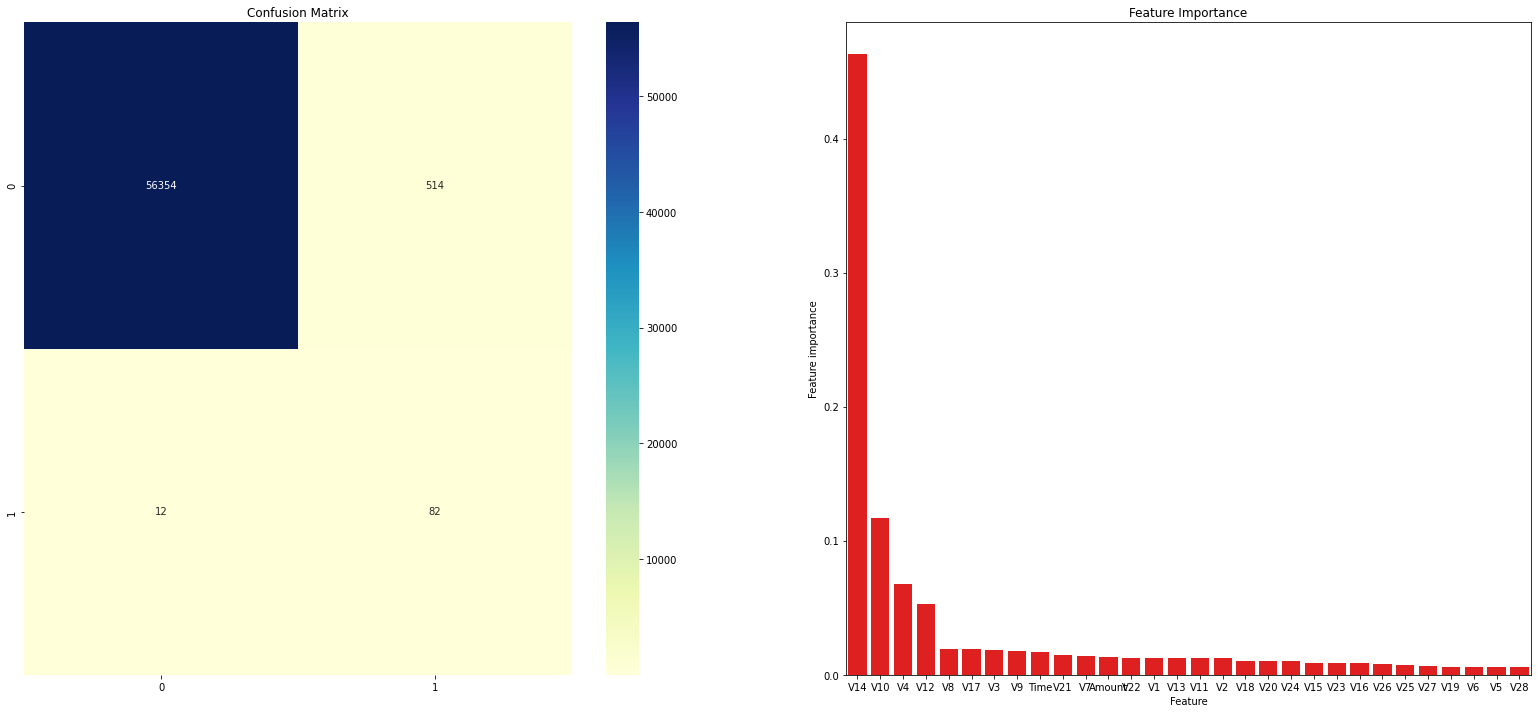

0.9907657736736772

In [35]:
predict2(xgb.XGBClassifier(silent=True,max_depth=2,tree_method = 'gpu_hist',predictor='gpu_predictor',eval_metric='auc'),X_smote,X_test, Y_smote, y_test)

[[56857    11]
 [   17    77]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.88      0.82      0.85        94

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Precision Neural Net: 0.875
Recall Neural Net: 0.8191489361702128
roc_score 0.9094777528849938


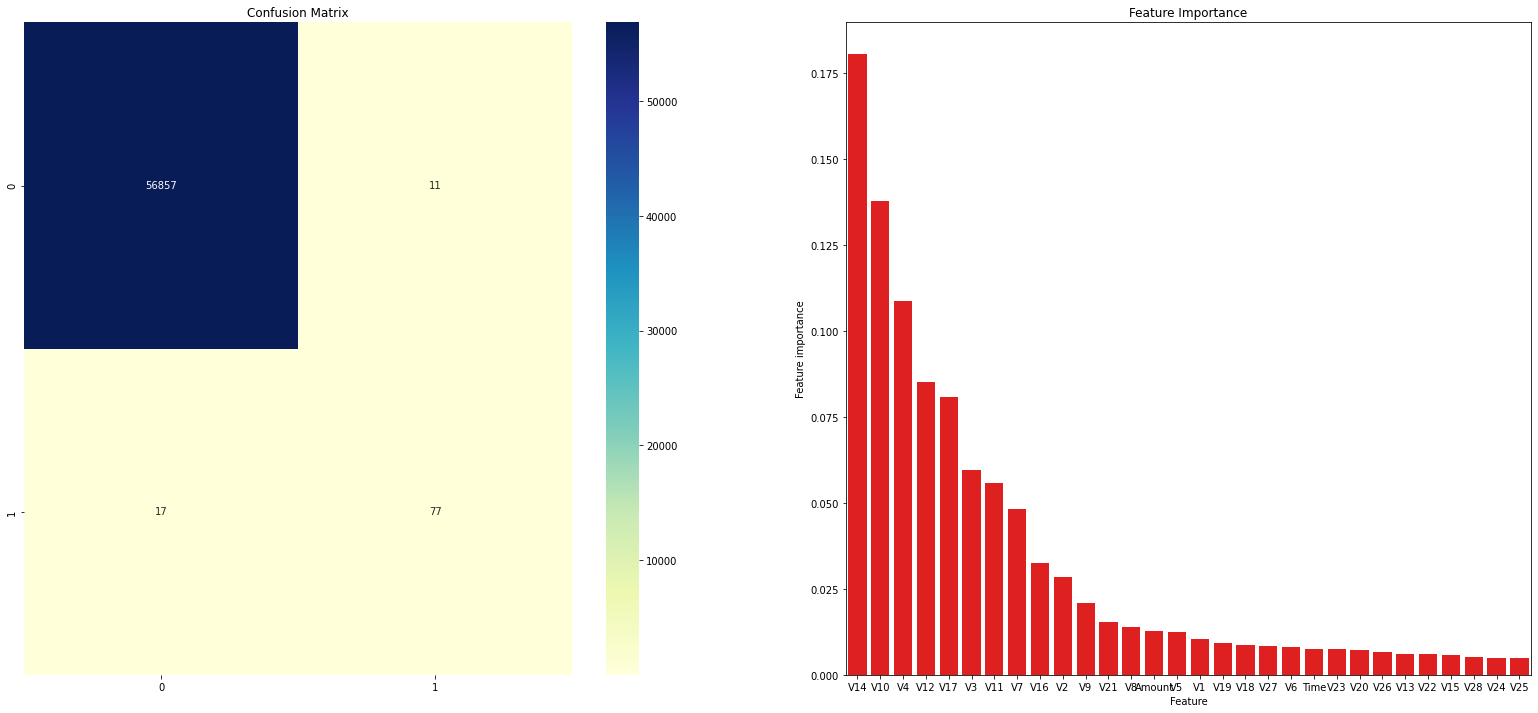

0.9995084442259752

In [36]:
predict2(RandomForestClassifier(n_estimators=100,n_jobs=4,verbose=False),X_smote,X_test, Y_smote, y_test)

[[55579  1289]
 [   11    83]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56868
           1       0.06      0.88      0.11        94

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962

Precision Neural Net: 0.060495626822157436
Recall Neural Net: 0.8829787234042553
roc_score 0.9301560987071217


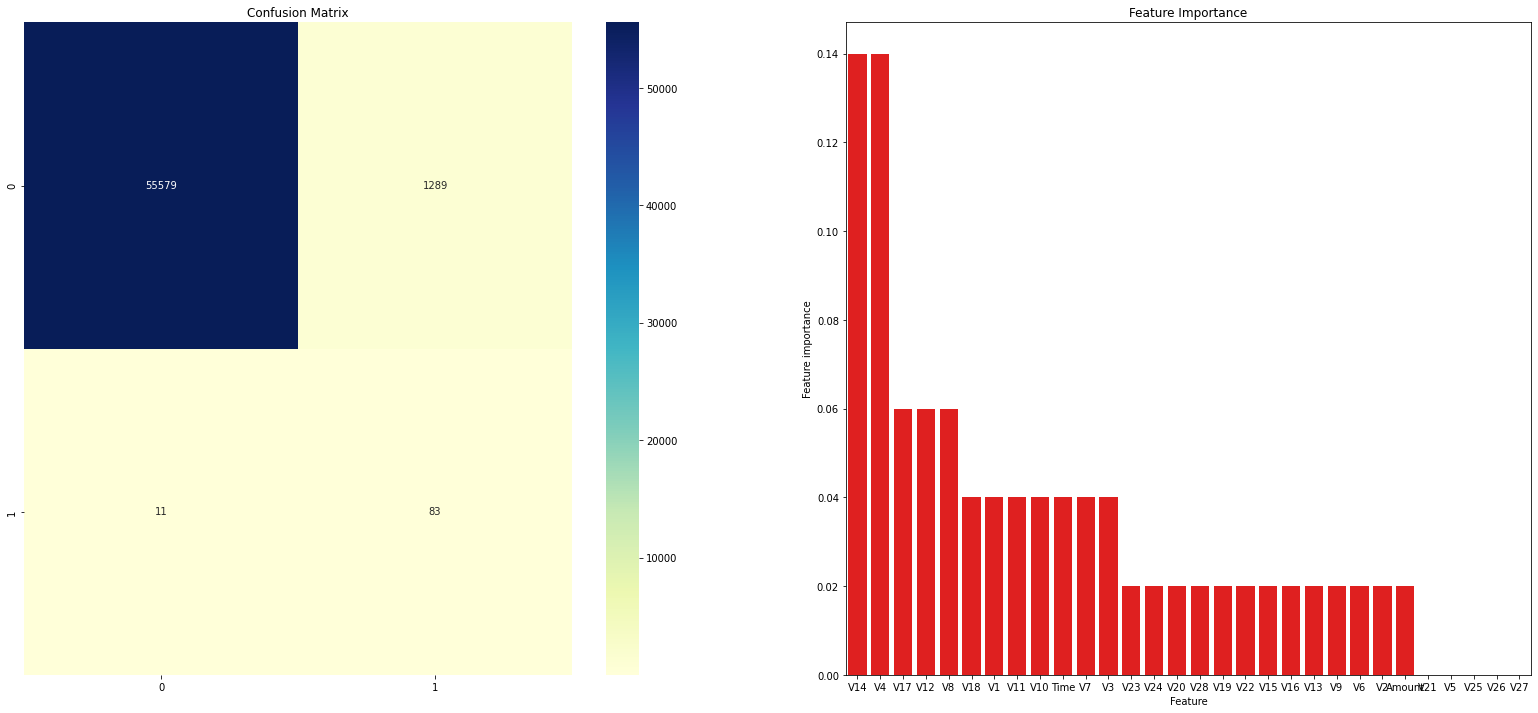

0.9771777676345634

In [37]:
predict2(AdaBoostClassifier(random_state=42,
                        algorithm='SAMME.R',
                         learning_rate=0.8,),X_smote,X_test, Y_smote, y_test)

[[55843  1025]
 [    9    85]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56868
           1       0.08      0.90      0.14        94

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.57     56962
weighted avg       1.00      0.98      0.99     56962

Precision Neural Net: 0.07657657657657657
Recall Neural Net: 0.9042553191489362
roc_score 0.9431155613821631


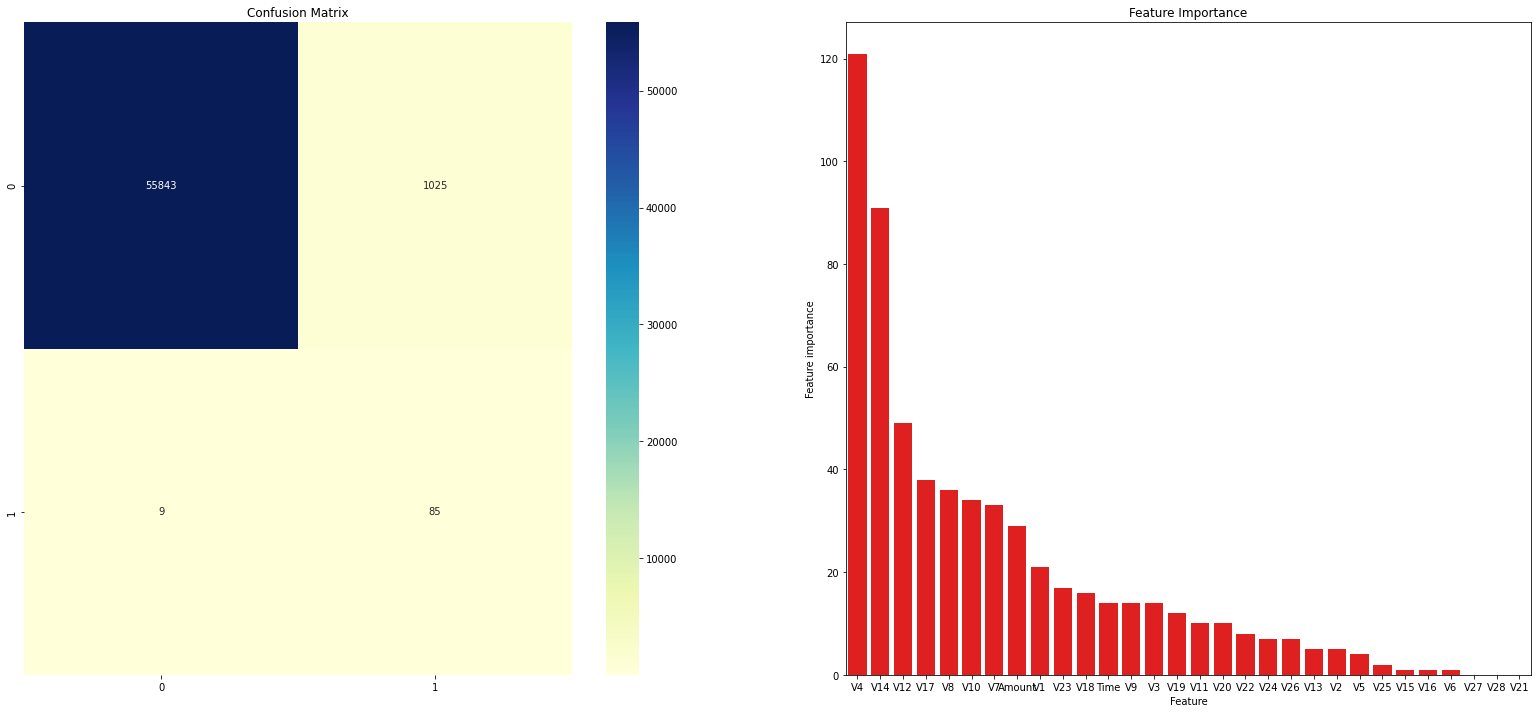

0.9818475474877989

In [38]:
predict2(lgb.LGBMClassifier(
    objective='binary',
        metric = 'auc',
          learning_rate= 0.05,
          num_leaves =  7,max_depth=4,min_child_samples= 100,  
          max_bin=100,device= 'gpu'),X_smote,X_test, Y_smote, y_test)

now let's try some feature selection to see if we can improve it a bit further using xgb

fun thing is all plots are showing that Amount really has small importance which is quite interesting but mostly it depends on 
V14, V10 , v4 and v17 in few cases


In [39]:
model =xgb.XGBClassifier(silent=True,max_depth=2,tree_method = 'gpu_hist',predictor='gpu_predictor',eval_metric='auc')

In [40]:
model.fit(X_smote,Y_smote)

[17:21:20] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=0, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, predictor='gpu_predictor', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, silent=True,
              subsample=1, tree_method='gpu_hist', validate_parameters=1,
              verbosity=None)

In [41]:
slm = SelectFromModel(model, threshold = 0.2)

In [42]:
X_train_XGB =slm.fit_transform(X_smote,Y_smote)

[17:21:21] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [43]:
#need to select same features as train dataset
X_test_XGB= np.array(X_test[X_test.columns[slm.get_support()]])

In [44]:
X_train_XGB

array([[ -0.0694688 ],
       [ -0.87780134],
       [ -0.77346466],
       ...,
       [ -1.74622822],
       [ -4.28410462],
       [-13.43101905]])

In [45]:
#preparing the train and test datasets
d_train= xgb.DMatrix(pd.DataFrame(X_train_XGB), Y_smote)
d_test= xgb.DMatrix(pd.DataFrame(X_test_XGB),y_test)

##to monitor train and  test
watch_list= [(d_train,'train'), (d_test, 'test')]

In [46]:
params = {}
params['objective'] = 'binary:logistic'
params['silent'] = True
params['max_depth'] = 2
params['eval_metric'] = 'auc'
params['random_state'] = 50
params['tree_method'] = 'gpu_hist'
params['predictor']='gpu_predictor'


In [47]:
model1 = xgb.train(params,d_train,200, watch_list)

[17:21:23] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-auc:0.94969	test-auc:0.95638
[1]	train-auc:0.95110	test-auc:0.96450
[2]	train-auc:0.95163	test-auc:0.96486
[3]	train-auc:0.95188	test-auc:0.96541
[4]	train-auc:0.95218	test-auc:0.96542
[5]	train-auc:0.95420	test-auc:0.96714
[6]	train-auc:0.95422	test-auc:0.96731
[7]	train-auc:0.95451	test-auc:0.96783
[8]	train-auc:0.95616	test-auc:0.96359
[9]	train-auc:0.95616	test-auc:0.96351
[10]	train-auc:0.95617	test-auc:0.96351
[11]	train-auc:0.95630	test-auc:0.96364
[12]	train-auc:0.95630	test-auc:0.96364
[13]	train-auc:0.95631	test-auc:0.96367
[14]	train-auc:0.95631	test-auc:0.96367
[15]	train-auc:0.95651	test-auc:0.96420
[16]	train-au

In [48]:
preds=model1.predict(d_test)

<AxesSubplot:title={'center':'Feature importance '}, xlabel='F score', ylabel='Features'>

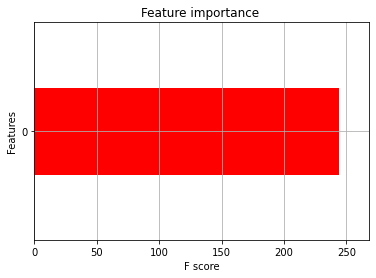

In [49]:
xgb.plot_importance(model1, height=0.8, title="Feature importance ",color='red',show_values=False)

In [50]:
roc_auc_score(y_test ,preds)

0.9628147827219136

looks like ML models are quite good for these but accuracy does decrease when you use balanced data now let's try some neural networks on these

In [51]:
#let's try with imbalanced data for now
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers

from keras.layers.recurrent import LSTM

In [52]:
n_inputs = len(X_train.columns)

In [53]:
model = Sequential()

# First Hidden Layer 
model.add(Dense(50, input_dim = n_inputs, activation = 'relu', kernel_initializer = 'he_uniform'))

# Define output layer
model.add(Dense(1, activation = 'sigmoid'))


2021-11-16 17:21:32.092216: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-16 17:21:32.093382: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-16 17:21:32.094064: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-16 17:21:32.094877: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [54]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam'
)

In [55]:
model.fit(X_train, y_train, epochs = 20)

2021-11-16 17:21:37.574453: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
7121/7121 [==============================] - 18s 2ms/step - loss: 0.0115
Epoch 2/20
7121/7121 [==============================] - 17s 2ms/step - loss: 0.0033
Epoch 3/20
7121/7121 [==============================] - 16s 2ms/step - loss: 0.0028
Epoch 4/20
7121/7121 [==============================] - 17s 2ms/step - loss: 0.0027
Epoch 5/20
7121/7121 [==============================] - 16s 2ms/step - loss: 0.0026
Epoch 6/20
7121/7121 [==============================] - 18s 3ms/step - loss: 0.0023
Epoch 7/20
7121/7121 [==============================] - 16s 2ms/step - loss: 0.0022
Epoch 8/20
7121/7121 [==============================] - 17s 2ms/step - loss: 0.0021
Epoch 9/20
7121/7121 [==============================] - 16s 2ms/step - loss: 0.0020
Epoch 10/20
7121/7121 [==============================] - 18s 3ms/step - loss: 0.0019
Epoch 11/20
7121/7121 [==============================] - 17s 2ms/step - loss: 0.0019
Epoch 12/20
7121/7121 [==============================] - 18s 2ms/step - lo

In [56]:
y_pred_nn = np.argmax(model.predict(X_test), axis=-1)

In [57]:
print("Accuracy Neural Net:",metrics.accuracy_score(y_test, y_pred_nn))
print("Precision Neural Net:",metrics.precision_score(y_test, y_pred_nn))
print("Recall Neural Net:",metrics.recall_score(y_test, y_pred_nn))
print("F1 Score Neural Net:",metrics.f1_score(y_test, y_pred_nn))

Accuracy Neural Net: 0.9983497770443454
Precision Neural Net: 0.0
Recall Neural Net: 0.0
F1 Score Neural Net: 0.0


In [58]:
#AUC

y_pred_nn_proba = model.predict(X_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test,y_pred_nn_proba)
auc_keras = auc(fpr_keras, tpr_keras)
print('AUC Neural Net: ', auc_keras)

AUC Neural Net:  0.9593915884339844


In [59]:
#not bad now lets try with smote balanced one
model.fit(X_smote, Y_smote, epochs = 20)

Epoch 1/20
14216/14216 [==============================] - 35s 2ms/step - loss: 0.0088
Epoch 2/20
14216/14216 [==============================] - 34s 2ms/step - loss: 0.0036
Epoch 3/20
14216/14216 [==============================] - 35s 2ms/step - loss: 0.0023
Epoch 4/20
14216/14216 [==============================] - 35s 2ms/step - loss: 0.0020
Epoch 5/20
14216/14216 [==============================] - 35s 2ms/step - loss: 0.0016
Epoch 6/20
14216/14216 [==============================] - 34s 2ms/step - loss: 0.0014
Epoch 7/20
14216/14216 [==============================] - 35s 2ms/step - loss: 0.0012
Epoch 8/20
14216/14216 [==============================] - 34s 2ms/step - loss: 0.0012
Epoch 9/20
14216/14216 [==============================] - 34s 2ms/step - loss: 9.7506e-04
Epoch 10/20
14216/14216 [==============================] - 36s 3ms/step - loss: 9.2371e-04
Epoch 11/20
14216/14216 [==============================] - 33s 2ms/step - loss: 9.2759e-04
Epoch 12/20
14216/14216 [===============

In [60]:
y_pred_nn = np.argmax(model.predict(X_test), axis=-1)

In [61]:
print("Accuracy Neural Net:",metrics.accuracy_score(y_test, y_pred_nn))
print("Precision Neural Net:",metrics.precision_score(y_test, y_pred_nn))
print("Recall Neural Net:",metrics.recall_score(y_test, y_pred_nn))
print("F1 Score Neural Net:",metrics.f1_score(y_test, y_pred_nn))

Accuracy Neural Net: 0.9983497770443454
Precision Neural Net: 0.0
Recall Neural Net: 0.0
F1 Score Neural Net: 0.0


In [62]:
#AUC

y_pred_nn_proba = model.predict(X_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test,y_pred_nn_proba)
auc_keras = auc(fpr_keras, tpr_keras)
print('AUC Neural Net: ', auc_keras)


AUC Neural Net:  0.9489836672907321


In [63]:
#let's  try multi layer perceptron as well
from sklearn.neural_network import MLPClassifier

[[56863     5]
 [   22    72]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.94      0.77      0.84        94

    accuracy                           1.00     56962
   macro avg       0.97      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962

roc_score 0.8829347619496587
Precision : 0.935064935064935
Recall : 0.7659574468085106


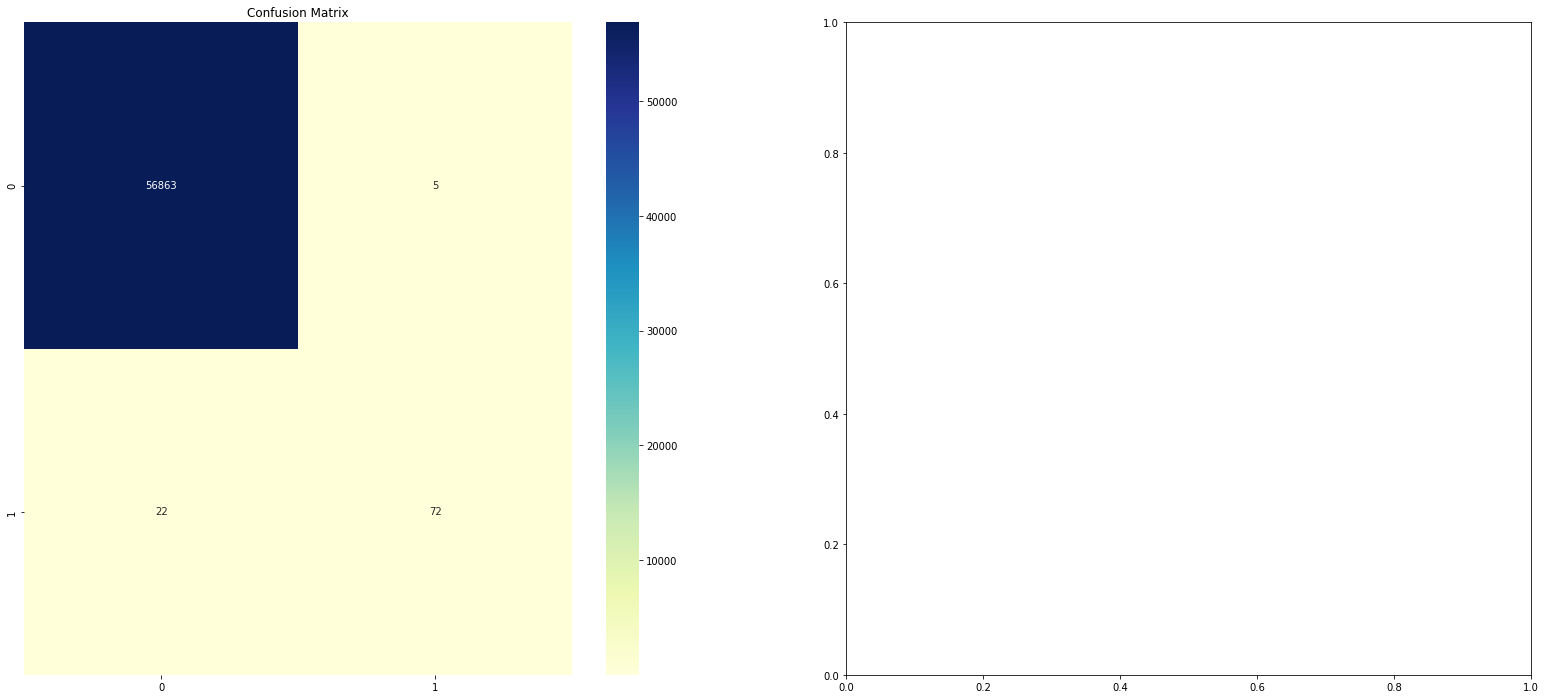

0.9995259997893332

In [64]:
predict(MLPClassifier(solver='lbfgs', hidden_layer_sizes=(100,100), random_state=2),X_train,X_test,y_train,y_test)

[[56840    28]
 [   19    75]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.73      0.80      0.76        94

    accuracy                           1.00     56962
   macro avg       0.86      0.90      0.88     56962
weighted avg       1.00      1.00      1.00     56962

roc_score 0.898689986067025
Precision : 0.7281553398058253
Recall : 0.7978723404255319


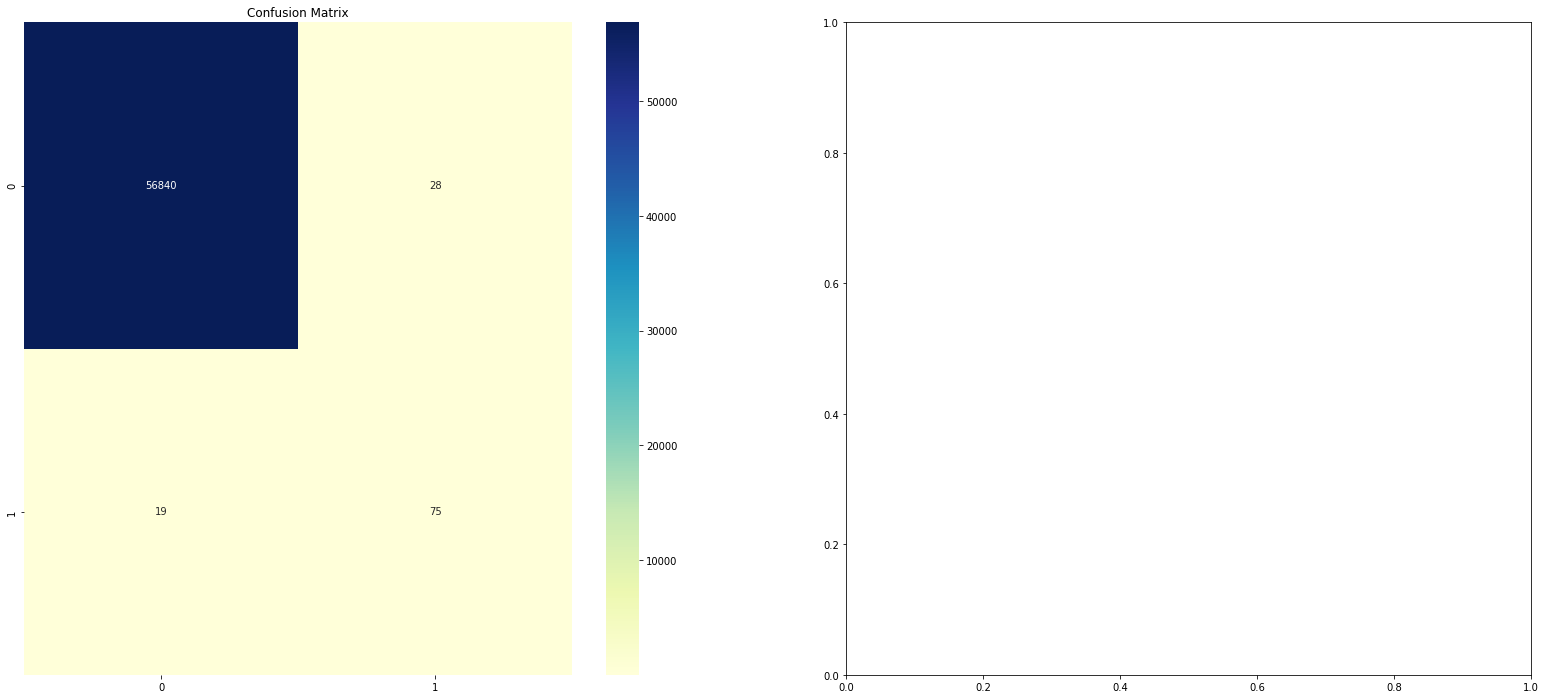

0.9991748885221726

In [65]:
predict(MLPClassifier(solver='lbfgs', hidden_layer_sizes=(100,100), random_state=2),X_smote,X_test,Y_smote,y_test)

[[56745   123]
 [   13    81]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.40      0.86      0.54        94

    accuracy                           1.00     56962
   macro avg       0.70      0.93      0.77     56962
weighted avg       1.00      1.00      1.00     56962

roc_score 0.9297696120467106
Precision : 0.39705882352941174
Recall : 0.8617021276595744


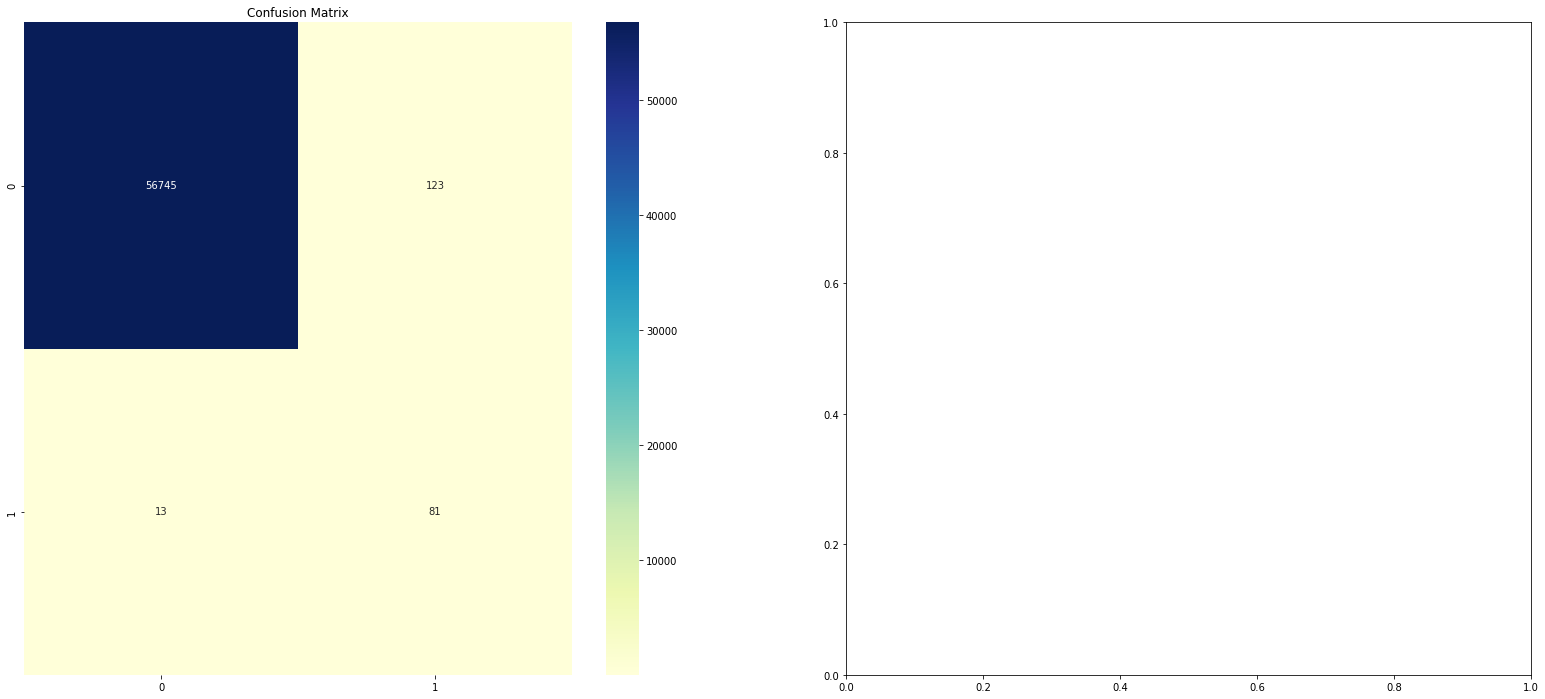

0.9976124433833081

In [66]:
predict(Knn(n_neighbors=5),X_smote,X_test,Y_smote,y_test)

[[55400  1468]
 [   15    79]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56868
           1       0.05      0.84      0.10        94

    accuracy                           0.97     56962
   macro avg       0.53      0.91      0.54     56962
weighted avg       1.00      0.97      0.99     56962

roc_score 0.9073056828878822
Precision : 0.05106658047834518
Recall : 0.8404255319148937


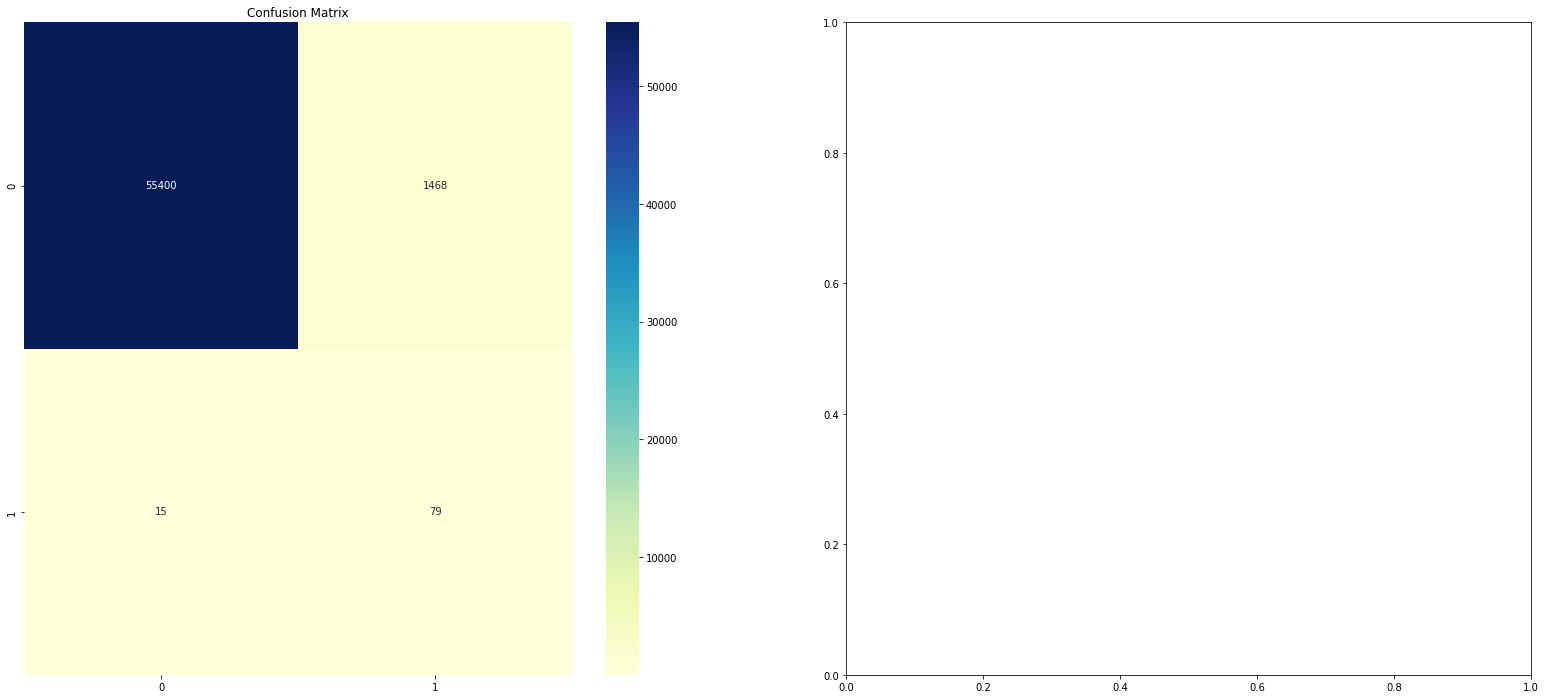

0.9739650995400443

In [67]:
predict(GaussianNB(),X_smote,X_test,Y_smote,y_test )

In [68]:
#now let's try with some dense networks
model = Sequential()
model.add(Dense(32, input_shape=(30,), activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(16, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(8, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(4, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(1, activation='sigmoid'))

In [69]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [70]:
history = model.fit(X_train, y_train, epochs = 10,  validation_split = 0.15, verbose = 1,
                    )
history_dict = history.history

Epoch 1/10
6053/6053 [==============================] - 23s 4ms/step - loss: 0.0327 - accuracy: 0.9928 - val_loss: 0.0045 - val_accuracy: 0.9989
Epoch 2/10
6053/6053 [==============================] - 22s 4ms/step - loss: 0.0073 - accuracy: 0.9989 - val_loss: 0.0034 - val_accuracy: 0.9987
Epoch 3/10
6053/6053 [==============================] - 23s 4ms/step - loss: 0.0060 - accuracy: 0.9989 - val_loss: 0.0031 - val_accuracy: 0.9988
Epoch 4/10
6053/6053 [==============================] - 24s 4ms/step - loss: 0.0051 - accuracy: 0.9989 - val_loss: 0.0033 - val_accuracy: 0.9992
Epoch 5/10
6053/6053 [==============================] - 22s 4ms/step - loss: 0.0052 - accuracy: 0.9989 - val_loss: 0.0029 - val_accuracy: 0.9991
Epoch 6/10
6053/6053 [==============================] - 22s 4ms/step - loss: 0.0049 - accuracy: 0.9990 - val_loss: 0.0033 - val_accuracy: 0.9992
Epoch 7/10
6053/6053 [==============================] - 25s 4ms/step - loss: 0.0048 - accuracy: 0.9990 - val_loss: 0.0030 - val_ac

Text(0.5, 0, 'Epochs')

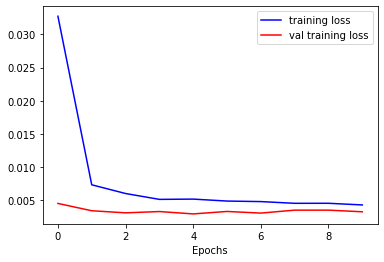

In [71]:
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

Text(0.5, 0, 'Epochs')

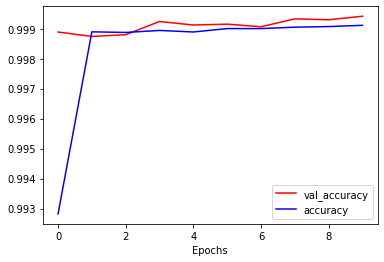

In [72]:
accuracy_values = history_dict['accuracy']
val_accuracy_values=history_dict['val_accuracy']
plt.plot(val_accuracy_values,'-r',label='val_accuracy')
plt.plot(accuracy_values,'-b',label='accuracy')
plt.legend()
plt.xlabel("Epochs")

In [73]:
y_pred_nn = np.argmax(model.predict(X_test), axis=-1)

In [74]:
print("Accuracy Neural Net:",metrics.accuracy_score(y_test, y_pred_nn))
print("Precision Neural Net:",metrics.precision_score(y_test, y_pred_nn))
print("Recall Neural Net:",metrics.recall_score(y_test, y_pred_nn))
print("F1 Score Neural Net:",metrics.f1_score(y_test, y_pred_nn))

Accuracy Neural Net: 0.9983497770443454
Precision Neural Net: 0.0
Recall Neural Net: 0.0
F1 Score Neural Net: 0.0


In [75]:
#AUC

y_pred_nn_proba = model.predict(X_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test,y_pred_nn_proba)
auc_keras = auc(fpr_keras, tpr_keras)
print('AUC Neural Net: ', auc_keras)

AUC Neural Net:  0.9681431916240522


In [76]:
#let's try same with balanced datasets as well


In [77]:
history = model.fit(X_smote, Y_smote, epochs = 10,  validation_split = 0.15, verbose = 1,
                    )
history_dict = history.history

Epoch 1/10
12084/12084 [==============================] - 45s 4ms/step - loss: 0.0885 - accuracy: 0.9620 - val_loss: 0.0071 - val_accuracy: 0.9996
Epoch 2/10
12084/12084 [==============================] - 50s 4ms/step - loss: 0.0325 - accuracy: 0.9907 - val_loss: 0.0043 - val_accuracy: 0.9996
Epoch 3/10
12084/12084 [==============================] - 42s 4ms/step - loss: 0.0308 - accuracy: 0.9913 - val_loss: 0.0063 - val_accuracy: 0.9986
Epoch 4/10
12084/12084 [==============================] - 43s 4ms/step - loss: 0.0289 - accuracy: 0.9920 - val_loss: 0.0109 - val_accuracy: 0.9995
Epoch 5/10
12084/12084 [==============================] - 48s 4ms/step - loss: 0.0285 - accuracy: 0.9923 - val_loss: 0.0037 - val_accuracy: 0.9995
Epoch 6/10
12084/12084 [==============================] - 43s 4ms/step - loss: 0.0268 - accuracy: 0.9928 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 7/10
12084/12084 [==============================] - 43s 4ms/step - loss: 0.0263 - accuracy: 0.9928 - val_loss: 0

Text(0.5, 0, 'Epochs')

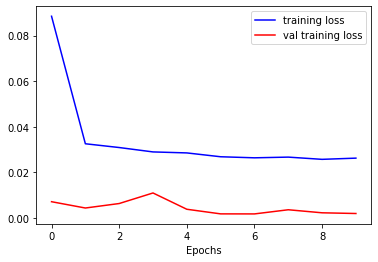

In [78]:
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

Text(0.5, 0, 'Epochs')

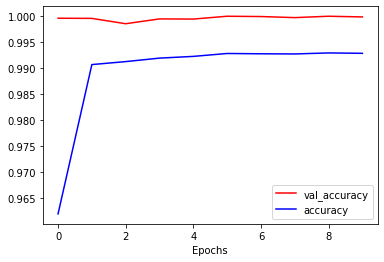

In [79]:
accuracy_values = history_dict['accuracy']
val_accuracy_values=history_dict['val_accuracy']
plt.plot(val_accuracy_values,'-r',label='val_accuracy')
plt.plot(accuracy_values,'-b',label='accuracy')
plt.legend()
plt.xlabel("Epochs")

In [80]:
y_pred_nn = np.argmax(model.predict(X_test), axis=-1)

In [81]:
print("Accuracy Neural Net:",metrics.accuracy_score(y_test, y_pred_nn))
print("Precision Neural Net:",metrics.precision_score(y_test, y_pred_nn))
print("Recall Neural Net:",metrics.recall_score(y_test, y_pred_nn))
print("F1 Score Neural Net:",metrics.f1_score(y_test, y_pred_nn))

Accuracy Neural Net: 0.9983497770443454
Precision Neural Net: 0.0
Recall Neural Net: 0.0
F1 Score Neural Net: 0.0


In [82]:
#AUC

y_pred_nn_proba = model.predict(X_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test,y_pred_nn_proba)
auc_keras = auc(fpr_keras, tpr_keras)
print('AUC Neural Net: ', auc_keras)

AUC Neural Net:  0.9515456847436168


now for unsupervised method

In [83]:
fraud=df[df['Class']==1]
normal = df[df['Class']==0]

In [84]:
n_outliers = len(fraud)

In [85]:
outlier_fraction = len(fraud)/float(len(normal))

In [86]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [87]:
normal_train,normal_test= train_test_split(normal, test_size= 0.30,random_state= 42)

In [88]:
model = IsolationForest()
model.fit(normal_train)
normal_pred_test = model.predict(normal_test)
fraud_pred = model.predict(fraud)

In [89]:
print("Accuracy in Detecting Legit Cases:", list(normal_pred_test).count(1)/normal_pred_test.shape[0])
print("Accuracy in Detecting Fraud Cases:", list(fraud_pred).count(-1)/fraud_pred.shape[0])

Accuracy in Detecting Legit Cases: 0.9660120757371475
Accuracy in Detecting Fraud Cases: 0.8048780487804879


In [90]:
model =LocalOutlierFactor(novelty=True)
model.fit(normal_train)
normal_pred_test = model.predict(normal_test)
fraud_pred = model.predict(fraud)

In [91]:
print("Accuracy in Detecting Legit Cases:", list(normal_pred_test).count(1)/normal_pred_test.shape[0])
print("Accuracy in Detecting Fraud Cases:", list(fraud_pred).count(-1)/fraud_pred.shape[0])

Accuracy in Detecting Legit Cases: 0.9505129257283546
Accuracy in Detecting Fraud Cases: 0.31910569105691056


now doing same for balanced dataset as well

In [92]:
X_Smote2 = X_smote
X_Smote2['Class'] = Y_smote

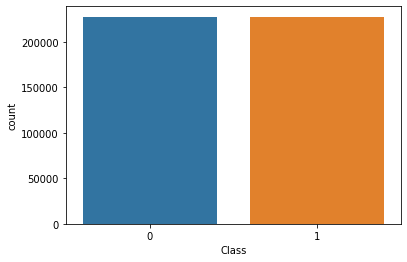

In [93]:
sns.countplot(X_Smote2['Class'])
plt.show()

In [94]:
fraud=X_Smote2[X_Smote2['Class']==1]
normal = X_Smote2[X_Smote2['Class']==0]

In [95]:
n_outliers = len(fraud)

In [96]:
outlier_fraction = len(fraud)/float(len(normal))

In [97]:
#same for smote balanced datasets as well
normal_train,normal_test= train_test_split(normal, test_size= 0.30,random_state= 42)

In [98]:
model = IsolationForest()
model.fit(normal_train)
normal_pred_test = model.predict(normal_test)
fraud_pred = model.predict(fraud)

In [99]:
print("Accuracy in Detecting Legit Cases:", list(normal_pred_test).count(1)/normal_pred_test.shape[0])
print("Accuracy in Detecting Fraud Cases:", list(fraud_pred).count(-1)/fraud_pred.shape[0])

Accuracy in Detecting Legit Cases: 0.9627463911482377
Accuracy in Detecting Fraud Cases: 0.8170914542728636


In [100]:
model =LocalOutlierFactor(novelty=True)
model.fit(normal_train)
normal_pred_test = model.predict(normal_test)
fraud_pred = model.predict(fraud)

In [101]:
print("Accuracy in Detecting Legit Cases:", list(normal_pred_test).count(1)/normal_pred_test.shape[0])
print("Accuracy in Detecting Fraud Cases:", list(fraud_pred).count(-1)/fraud_pred.shape[0])

Accuracy in Detecting Legit Cases: 0.9513446178647321
Accuracy in Detecting Fraud Cases: 0.3143237765281582


Using auto encoders now

In [102]:
#using auto encoders

model = Sequential()
model.add(Dense(100, input_shape=(30,), activation='tanh',activity_regularizer=regularizers.l1(10e-5))),

## encoding part

model.add(Dense(50, activation='relu')),

## decoding part
model.add(Dense(50, activation='tanh')),
model.add(Dense(100, activation='tanh')),

## output layer
model.add(Dense(1, activation='relu'))

In [103]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [104]:
history = model.fit(X_train, y_train, epochs = 10,  validation_split = 0.15, verbose = 1,
                    )
history_dict = history.history

Epoch 1/10
6053/6053 [==============================] - 23s 4ms/step - loss: 0.0292 - accuracy: 0.9982 - val_loss: 0.0245 - val_accuracy: 0.9984
Epoch 2/10
6053/6053 [==============================] - 21s 4ms/step - loss: 0.0274 - accuracy: 0.9982 - val_loss: 0.0244 - val_accuracy: 0.9984
Epoch 3/10
6053/6053 [==============================] - 22s 4ms/step - loss: 0.0274 - accuracy: 0.9982 - val_loss: 0.0244 - val_accuracy: 0.9984
Epoch 4/10
6053/6053 [==============================] - 21s 4ms/step - loss: 0.0274 - accuracy: 0.9982 - val_loss: 0.0244 - val_accuracy: 0.9984
Epoch 5/10
6053/6053 [==============================] - 22s 4ms/step - loss: 0.0274 - accuracy: 0.9982 - val_loss: 0.0244 - val_accuracy: 0.9984
Epoch 6/10
6053/6053 [==============================] - 25s 4ms/step - loss: 0.0274 - accuracy: 0.9982 - val_loss: 0.0244 - val_accuracy: 0.9984
Epoch 7/10
6053/6053 [==============================] - 24s 4ms/step - loss: 0.0274 - accuracy: 0.9982 - val_loss: 0.0244 - val_ac

Text(0.5, 0, 'Epochs')

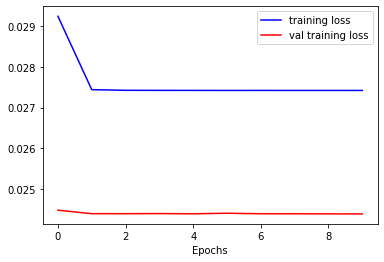

In [105]:
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

Text(0.5, 0, 'Epochs')

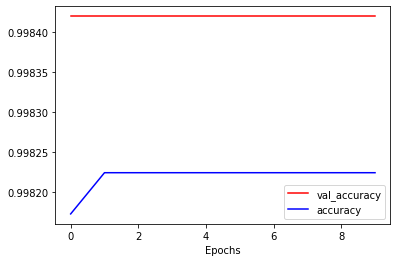

In [106]:
accuracy_values = history_dict['accuracy']
val_accuracy_values=history_dict['val_accuracy']
plt.plot(val_accuracy_values,'-r',label='val_accuracy')
plt.plot(accuracy_values,'-b',label='accuracy')
plt.legend()
plt.xlabel("Epochs")

In [107]:
y_pred_nn = np.argmax(model.predict(X_test), axis=-1)

In [108]:
print("Accuracy Neural Net:",metrics.accuracy_score(y_test, y_pred_nn))
print("Precision Neural Net:",metrics.precision_score(y_test, y_pred_nn))
print("Recall Neural Net:",metrics.recall_score(y_test, y_pred_nn))
print("F1 Score Neural Net:",metrics.f1_score(y_test, y_pred_nn))

Accuracy Neural Net: 0.9983497770443454
Precision Neural Net: 0.0
Recall Neural Net: 0.0
F1 Score Neural Net: 0.0


In [109]:
#AUC

y_pred_nn_proba = model.predict(X_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test,y_pred_nn_proba)
auc_keras = auc(fpr_keras, tpr_keras)
print('AUC Neural Net: ', auc_keras)

AUC Neural Net:  0.5


In [110]:
#now let's try with some dense networks
model = Sequential()
model.add(Dense(32, input_shape=(30,), activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(16, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(8, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(4, activation='relu')),


#decoding part
model.add(Dense(2,activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(4, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(8, activation='relu')),
model.add(Dropout(0.2)),

model.add(Dense(16, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(32, activation='relu')),
model.add(Dropout(0.2)),

model.add(Dense(1, activation ='sigmoid'))


In [111]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                992       
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_6 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_15 (Dense)             (None, 4)                

In [112]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [113]:
history = model.fit(X_train, y_train, epochs = 10,validation_split = 0.15, verbose = 1,
                    )
history_dict = history.history

Epoch 1/10
6053/6053 [==============================] - 28s 4ms/step - loss: 0.0222 - accuracy: 0.9982 - val_loss: 0.0084 - val_accuracy: 0.9984
Epoch 2/10
6053/6053 [==============================] - 27s 4ms/step - loss: 0.0121 - accuracy: 0.9982 - val_loss: 0.0088 - val_accuracy: 0.9984
Epoch 3/10
6053/6053 [==============================] - 27s 4ms/step - loss: 0.0113 - accuracy: 0.9982 - val_loss: 0.0074 - val_accuracy: 0.9984
Epoch 4/10
6053/6053 [==============================] - 26s 4ms/step - loss: 0.0109 - accuracy: 0.9982 - val_loss: 0.0087 - val_accuracy: 0.9984
Epoch 5/10
6053/6053 [==============================] - 35s 6ms/step - loss: 0.0107 - accuracy: 0.9982 - val_loss: 0.0083 - val_accuracy: 0.9984
Epoch 6/10
6053/6053 [==============================] - 26s 4ms/step - loss: 0.0106 - accuracy: 0.9982 - val_loss: 0.0082 - val_accuracy: 0.9984
Epoch 7/10
6053/6053 [==============================] - 27s 4ms/step - loss: 0.0104 - accuracy: 0.9982 - val_loss: 0.0078 - val_ac

Text(0.5, 0, 'Epochs')

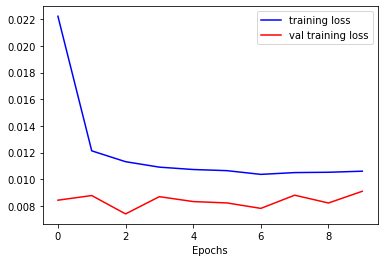

In [114]:
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

Text(0.5, 0, 'Epochs')

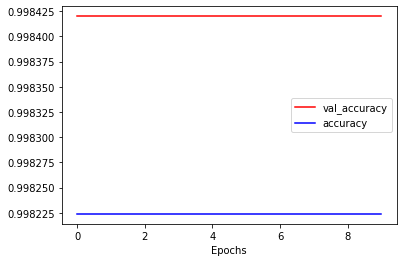

In [115]:
accuracy_values = history_dict['accuracy']
val_accuracy_values=history_dict['val_accuracy']
plt.plot(val_accuracy_values,'-r',label='val_accuracy')
plt.plot(accuracy_values,'-b',label='accuracy')
plt.legend()
plt.xlabel("Epochs")

In [116]:
y_pred_nn_proba = model.predict(X_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test,y_pred_nn_proba)
auc_keras = auc(fpr_keras, tpr_keras)
print('AUC Neural Net: ', auc_keras)

AUC Neural Net:  0.969756015797689


In [117]:
y_pred_nn = np.argmax(model.predict(X_test), axis=-1)

In [118]:
print("Accuracy Neural Net:",metrics.accuracy_score(y_test, y_pred_nn))
print("Precision Neural Net:",metrics.precision_score(y_test, y_pred_nn))
print("Recall Neural Net:",metrics.recall_score(y_test, y_pred_nn))
print("F1 Score Neural Net:",metrics.f1_score(y_test, y_pred_nn))

Accuracy Neural Net: 0.9983497770443454
Precision Neural Net: 0.0
Recall Neural Net: 0.0
F1 Score Neural Net: 0.0


In [119]:
#AUC

y_pred_nn_proba = model.predict(X_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test,y_pred_nn_proba)
auc_keras = auc(fpr_keras, tpr_keras)
print('AUC Neural Net: ', auc_keras)

AUC Neural Net:  0.969756015797689


In [120]:
#trying same for balanced datsets
history = model.fit(X_smote, Y_smote, epochs = 10, validation_split = 0.15, verbose = 1,
                    )
history_dict = history.history

Epoch 1/10


ValueError: in user code:

    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:853 train_function  *
        return step_function(self, iterator)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:835 run_step  **
        outputs = model.train_step(data)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:787 train_step
        y_pred = self(x, training=True)
    /opt/conda/lib/python3.7/site-packages/keras/engine/base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /opt/conda/lib/python3.7/site-packages/keras/engine/input_spec.py:254 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer sequential_3 is incompatible with the layer: expected axis -1 of input shape to have value 30 but received input with shape (None, 31)


In [ ]:
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

In [ ]:
accuracy_values = history_dict['accuracy']
val_accuracy_values=history_dict['val_accuracy']
plt.plot(val_accuracy_values,'-r',label='val_accuracy')
plt.plot(accuracy_values,'-b',label='accuracy')
plt.legend()
plt.xlabel("Epochs")

In [ ]:
y_pred_nn = np.argmax(model.predict(X_test), axis=-1)

In [ ]:
print("Accuracy Neural Net:",metrics.accuracy_score(y_test, y_pred_nn))
print("Precision Neural Net:",metrics.precision_score(y_test, y_pred_nn))
print("Recall Neural Net:",metrics.recall_score(y_test, y_pred_nn))
print("F1 Score Neural Net:",metrics.f1_score(y_test, y_pred_nn))

In [ ]:
#AUC

y_pred_nn_proba = model.predict(X_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test,y_pred_nn_proba)
auc_keras = auc(fpr_keras, tpr_keras)
print('AUC Neural Net: ', auc_keras)

AUC improved to 91 which is quite good